In [1]:
import pandas as pd 
import string
from textblob import TextBlob
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools
import collections
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from nltk.stem import PorterStemmer


In [2]:
df = pd.read_csv('depressive_and_random_dataset.csv')
df.head()

,Unnamed: 0,tweet,sentiment_label
0,0,Yesterday I diagnosed depression. What's next ...,0
1,1,Advice younger self : Depression doesnâ€™t go ...,0
2,2,@Lwhittenhart Hi Iâ€™m angry depression,0
3,3,Need hair done bad . Iâ€™m hair depression ima...,0
4,4,happiness contest depression contest receiving...,1


In [4]:
clean_tweets = [clean_tweet(t) for t in df.tweet.values]

In [5]:
print(len(clean_tweets))
words = ''.join(clean_tweets).split(' ')
count_words = collections.Counter(words)
count_words.most_common(20)

451494


[('depression', 92170),
 ('im', 47747),
 ('suicide', 46746),
 ('lonely', 36886),
 ('like', 30304),
 ('get', 23206),
 ('good', 19057),
 ('one', 18453),
 ('dont', 17986),
 ('day', 17541),
 ('time', 17421),
 ('know', 16784),
 ('go', 16625),
 ('people', 16206),
 ('got', 15912),
 ('love', 15153),
 ('cant', 15054),
 ('going', 14904),
 ('really', 14546),
 ('feel', 14295)]

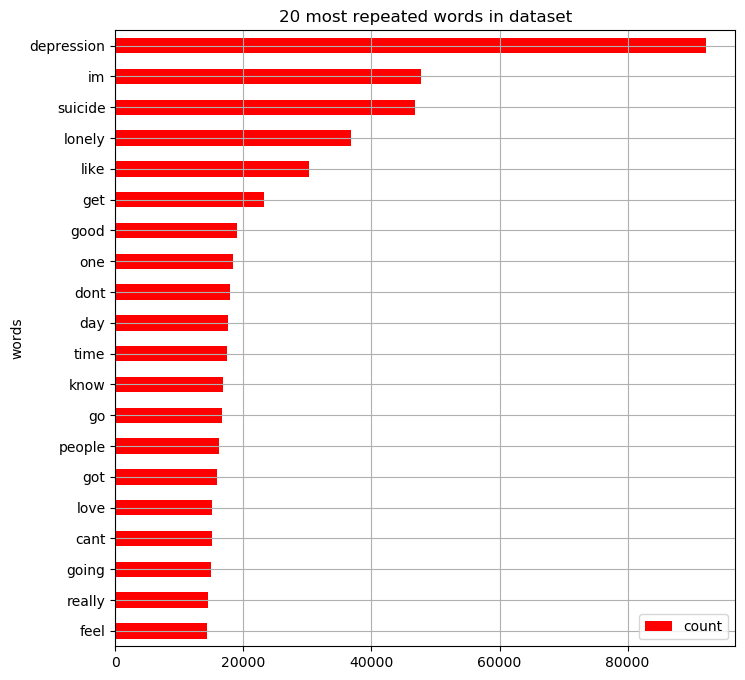

In [10]:
count_words_df = pd.DataFrame(count_words.most_common(20),
                             columns=['words', 'count'])
count_words_df.head
show_bar_plot(count_words_df, 'red', '20 most repeated words in dataset')

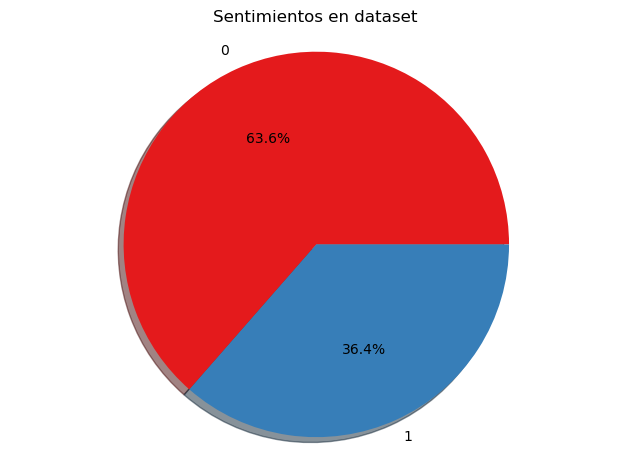

In [11]:
show_pie_chart(df, 'sentiment_label', 'Sentimientos en dataset')

In [12]:
tweets_major_len = [t for t in clean_tweets if len(str(t)) > 6]
print(len(tweets_major_len))

445427


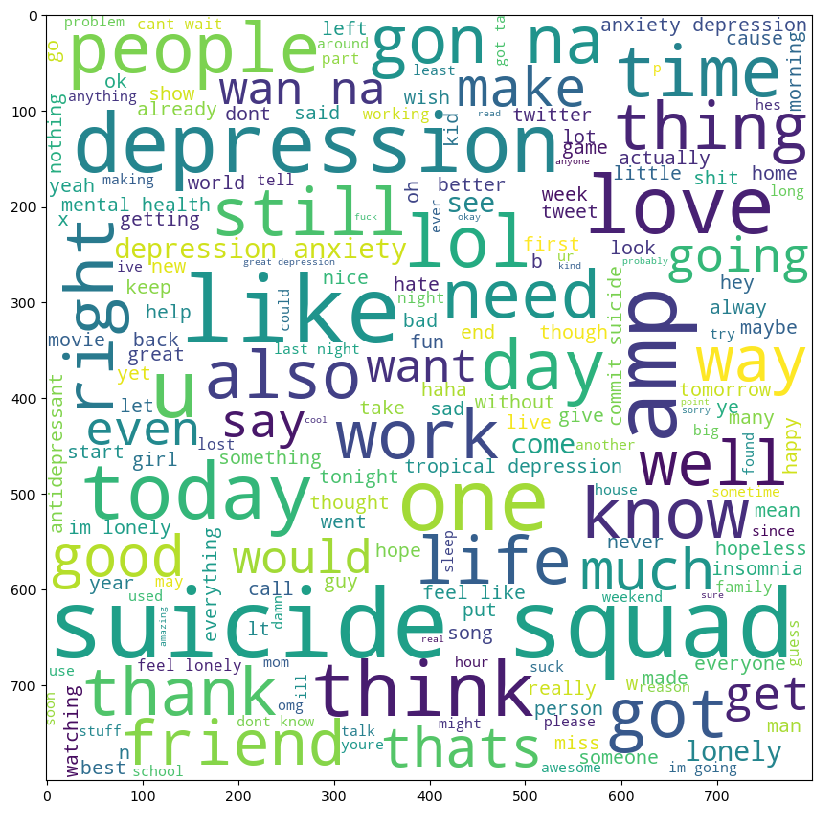

In [13]:
show_word_cloud(''.join(tweets_major_len))

In [3]:
def clean_tweet(tweet):
    '''
    tweet -> is a single string 
    This method allows to remove some things in a tweet like the users, hashtags
    made by Cristian G. Sánchez Pineda based on: https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90,
    and: https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
    and: https://stackoverflow.com/questions/42370508/how-to-delete-special-characters-such-as-%C5%92%C3%B0%C5%B8-from-tweets
    '''
    #if len(demoji.findall(tweet))>0:
    #    tweet = demoji.replace(tweet, '')
    tweet = str(tweet)
    tweet = tweet.replace("'", '')
    tweet = tweet.replace("’",'')
    tweet = tweet.replace("…",'')
    tweet = ''.join([c for c in tweet if ord(c) < 128])
    tweet = re.sub(r'[0-9]', ' ', tweet) 
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r'[@#][^\s]+', ' ',tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    tweet = remove_punctuation(tweet)
    tweet = remove_stop_words_tweet(tweet)
    tweet = PorterStemmer().stem(tweet)
    return tweet

def remove_punctuation(tweet):
    '''
    tweet -> is a single string
    returns -> the string without punctuation
    Based on: https://stackoverrun.com/es/q/9452812
    '''
    tweet = re.sub('['+string.punctuation+']', '', tweet)
    return tweet

def remove_stop_words_tweet(tweet):
    '''
    tweet -> is a single string
    This method allows to remove the stopwords in english for a text
    made by Cristian G. Sánchez Pineda based on: "!#!"#!
    '''
    blob = TextBlob(tweet)
    stop_words = stopwords.words('english')
    items = blob.word_counts.items()
    textClean = [item for item in items if item[0] not in stop_words]
    listClean  = []
    for text in textClean:
        listClean.append(text[0]+" ")
    return "".join(listClean)

In [7]:
def show_bar_plot(dataframe, color, title):
    """
    based on: https://github.com/ram574/Detecting-Depression-in-Social-Media-via-Twitter-Usage/blob/main/02_data_cleaning.ipynb
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    dataframe.sort_values(by='count').plot(kind='barh', x='words', y='count', ax=ax, color=color, linestyle='-')

    ax.set_title(title)
    plt.grid(True)
    plt.show()

In [8]:
def show_pie_chart(data, column, title):
    '''
    This method allows to create a pie chart with a particular design
    Made by: Cristian G. Sánchez Pineda, based on: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
    '''
    sns.set_palette("Set1")
    labels = data[column].astype('category').cat.categories.tolist()
    counts = data[column].value_counts()
    sizes = [counts[value] for value in labels]
    _, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)  # autopct is show the % on plot
    fig = plt.gcf()
    ax1.axis('equal') 
    plt.title(title) 
    plt.tight_layout()
    plt.show()

In [9]:
def show_word_cloud(interestingWords):
    '''
    This method allows to create a word cloud using the
    made by Cristian G. Sánchez Pineda, based on: teacher Sonia's material  class
    '''
    stop = stopwords.words('english')  
    wordCloud = WordCloud(width=800, height=800, background_color='White', stopwords=stop, min_font_size=10).generate(interestingWords)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordCloud)
    plt.axis('on')
    plt.tight_layout(pad=0)
    plt.show()